1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as la
from scipy.linalg import svd
import pandas as pd

n = 1000

x1 = np.random.normal(0, 1, n)
x2 = x1 + np.random.normal(0, 3, n)
x3 = (2*x1 + x2)

x = np.array([x1,x2,x3])

cov = np.cov([x1,x2,x3])
print("Covariance matrix:\n", cov, '\n')
# eigenvectors of the covariance matrix
l, V = la.eig(cov)
# take only the real component, if possible
l = np.real_if_close(l)

U, S, Vt = np.linalg.svd(x)
svd_val = S**2/(n-1)
#svd_val = S
svd_vec = U


#eigenvectors is sorted according to the order of the eigenvalues.
#l_svd = S.T[[1, 2]] = S.T[[2, 1]]
v_svd = U.T[[1, 2]] = U.T[[2, 1]]
# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", svd_val)


# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", svd_vec)



Covariance matrix:
 [[ 1.02044228  1.00187777  3.04276232]
 [ 1.00187777  9.73575798 11.73951351]
 [ 3.04276232 11.73951351 17.82503814]] 

Eigendecomposition:
 [2.65639919e+01 8.30548008e-16 2.01724650e+00]
SVD:
 [2.65643542e+01 2.01732781e+00 1.39022143e-31]
Eigendecomposition:
 [[-0.11907192 -0.81649658  0.56493824]
 [-0.57283328 -0.40824829 -0.71077096]
 [-0.81097713  0.40824829  0.41910551]]
SVD:
 [[-0.11906797 -0.81649658  0.56493907]
 [-0.57283825 -0.40824829 -0.71076696]
 [-0.8109742   0.40824829  0.41911118]]


In [2]:
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')


print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0,0]/Lambda.trace()))
print("It makes sense because x1 doesn't depends from other features and provides a lot of information \n")

lm = Lambda[0,0]+Lambda[2,2]
print("By selecting the component 0 and 2, we retain %.2f%% of the total variability" % (lm/Lambda.trace()))

# Redefine the data in the basis yielded by the PCA procedure
x_new = np.dot(V.T,x)


Lambda:
 [[2.65639919e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.30548008e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.01724650e+00]] 

Trace(A):
 28.581238392731677 

Trace(Lambda):
 28.58123839273167 

By selecting the component 0, we retain 0.93% of the total variability
It makes sense because x1 doesn't depends from other features and provides a lot of information 

By selecting the component 0 and 2, we retain 1.00% of the total variability


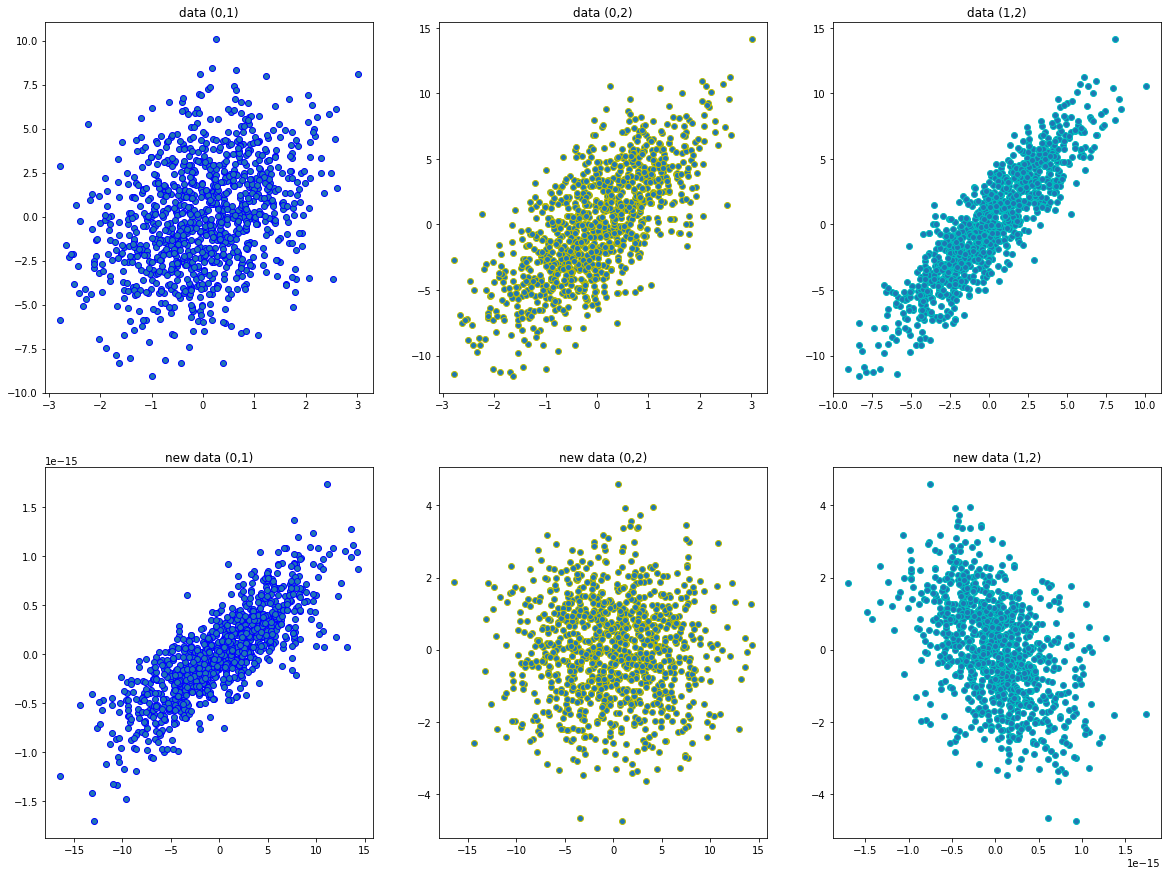

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

axs[0,0].scatter(x[0,:],x[1,:],marker='o', edgecolor='b')
axs[0,0].set_title('data (0,1)')
axs[0,1].scatter(x[0,:],x[2,:],marker='o', edgecolor='y')
axs[0,1].set_title('data (0,2)')
axs[0,2].scatter(x[1,:],x[2,:], marker='o', edgecolor='c')
axs[0,2].set_title('data (1,2)')

axs[1,0].scatter(x_new[0,:],x_new[1,:], marker='o', edgecolor='b')
axs[1,0].set_title('new data (0,1)')
axs[1,1].scatter(x_new[0,:],x_new[2,:], marker='o', edgecolor='y')
axs[1,1].set_title('new data (0,2)')
axs[1,2].scatter(x_new[1,:],x_new[2,:], marker='o', edgecolor='c')
axs[1,2].set_title('new data (1,2)')

plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

By selecting the component 0 and 2 the Percentage variability of the reduced system is
 100.17507663207988 %


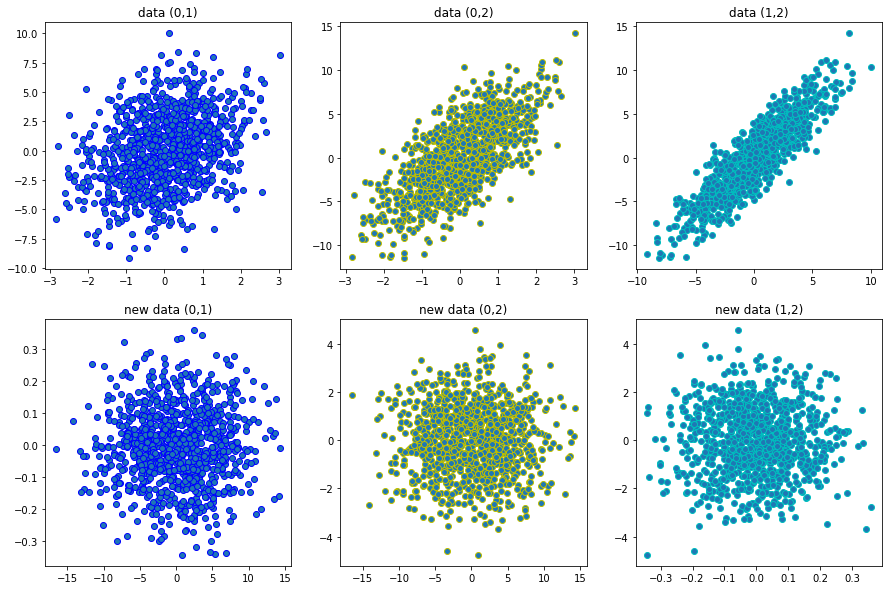

In [4]:
noises = np.random.normal(loc=0, scale=1/25, size=(3, n, 10))
x_noise = x + np.sum(noises, axis = 2)

# Reducind dimension using PCA
cov1 = np.cov(x_noise)
l1, V1 = np.linalg.eig(cov1)
l1 = np.real_if_close(l1)
U1, S1, Vt1 = la.svd(x_noise)
l_svd1 = S1**2/(n-1)
V_svd1 = U1


print('By selecting the component 0 and 2 the Percentage variability of the reduced system is\n', (np.sum(l1[[0,2]])/Lambda.trace())*100,'%')

# plotting profile plots of x in the new coordinates
x_new1 = np.dot(V1.T,x_noise)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs[0,0].scatter(x_noise[0,:],x_noise[1,:],marker='o', edgecolor='b')
axs[0,0].set_title('data (0,1)')
axs[0,1].scatter(x_noise[0,:],x_noise[2,:],marker='o', edgecolor='y')
axs[0,1].set_title('data (0,2)')
axs[0,2].scatter(x_noise[1,:],x_noise[2,:], marker='o', edgecolor='c')
axs[0,2].set_title('data (1,2)')

axs[1,0].scatter(x_new1[0,:],x_new1[1,:],marker='o', edgecolor='b')
axs[1,0].set_title('new data (0,1)')
axs[1,1].scatter(x_new1[0,:],x_new1[2,:],marker='o', edgecolor='y')
axs[1,1].set_title('new data (0,2)')
axs[1,2].scatter(x_new1[1,:],x_new1[2,:], marker='o', edgecolor='c')
axs[1,2].set_title('new data (1,2)')

plt.show()

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [5]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 